In [1]:
import importlib
import datetime as dt

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

from scipy import stats

import plotly.graph_objects as ptly
import plotly.express as px

import waldluft as wl

plt.style.use("janjo-v0-0.mplstyle")

/Users/Janjo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED

Bad key xtick.labelcolor in file janjo-v0-0.mplstyle, line 77 ('xtick.labelcolor: k')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key ytick.labelcolor in file janjo-v0-0.mplstyle, line 88 ('ytick.labelcolor: k')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution


In [76]:
importlib.reload(wl)

<module 'waldluft' from '/Users/Janjo/Documents/MEINE DOKUMENTE/Projects/kaltluftstrom/waldluft.py'>

In [77]:
inst = wl.Timed("raw_data", encoding="iso8859-1")

Successfully imported the following sensor data:
    WTDL:
        W6
        W7
        W5
        W4
        W1
        W3
        W2
        W9
        W8
    SHT:
        S1  98:2B
        S3  A5:6D
        S2  B1:5B
        S7  79:D0
        S9  CD:A2
        S8  E1:E1


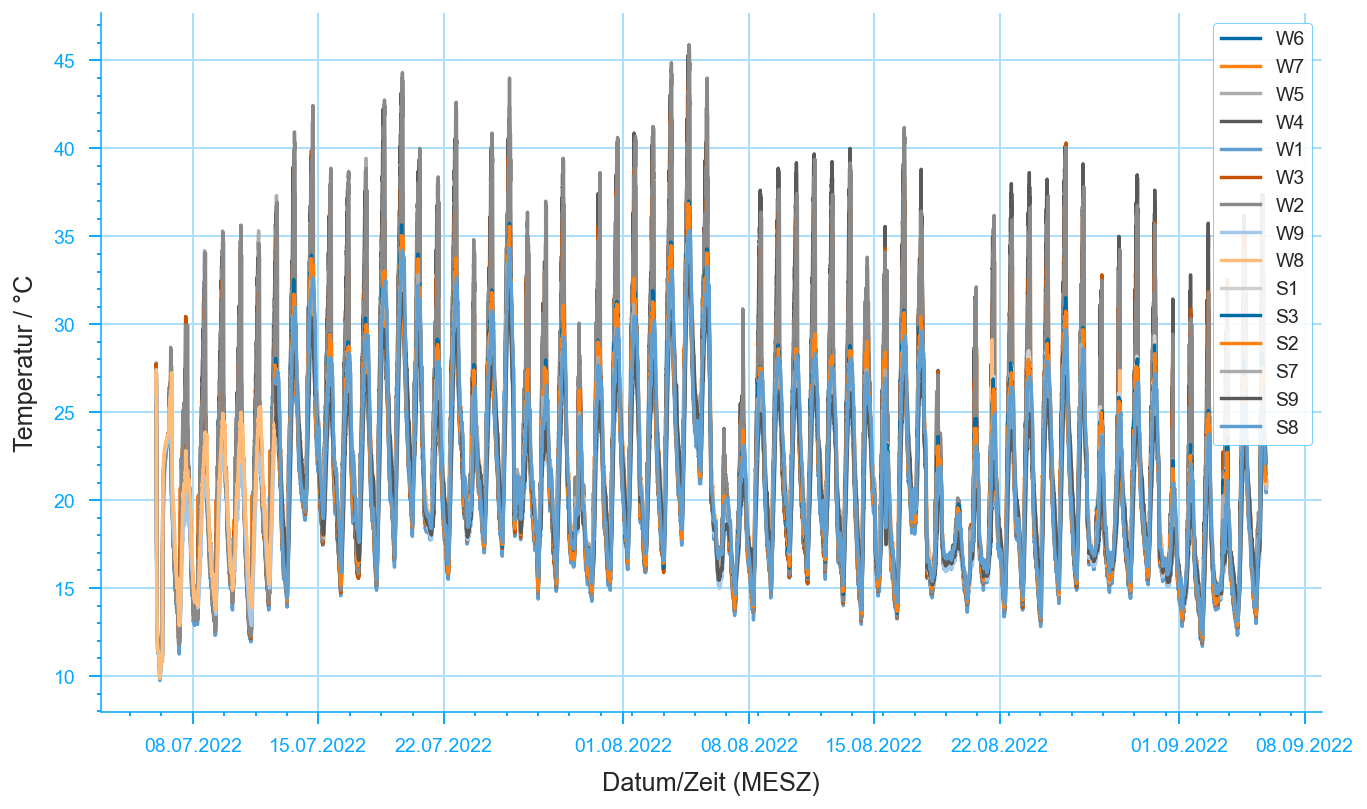

In [3]:
inst.plot_temp_time()

In [ ]:
inst.plot_temp_time(
    sensor_type="wtdl",
    sensor_locations=(2, 5, 6, 7, 8, 9),
    xlim=(dt.datetime(2022,8,2), dt.datetime(2022,8,6)),
    ylim=(15, 40),
    file_export=True,
    file_export_type="png",
    title="Hitzetage in der ersten Augustwoche",
)

In [ ]:
inst.plot_temp_time(
    sensor_type="sht",
    sensor_locations=(2, 5, 6, 7, 8, 9),
    xlim=(dt.datetime(2022,8,2), dt.datetime(2022,8,6)),
    ylim=(15, 40),
    file_export=True,
    file_export_type="png",
    title="Hitzetage in der ersten Augustwoche",
)

In [ ]:
inst.plot_temp_time_interactive("W2", title="WTDL Standort 2")

In [ ]:
inst.plot_temp_time_interactive("W2", "S2", "W3", "S3", title="Standorte 2 und 3")

In [ ]:
inst.plot_temp_time_interactive("W2", "W8", "W9", title="Standorte 2 (Referenz), 8 (Quartier) und 9 (Wald)")

In [ ]:
inst.plot_temp_time_interactive(plot_all=True)

In [8]:
ignore_dates = (
    dt.datetime(2022,7,5), # Vor Montage
    dt.datetime(2022,8,18), # Wetterumschwung
)

inst.extract_dateseries(
    ignore_dates=ignore_dates,
)
inst.extract_dateseries(
    timedelta_start={"hours":27},
    key="27-1",
    ignore_dates=ignore_dates,
)

In [ ]:
inst.plot_dateseries_interactive()

In [11]:
inst.timeseries["S1"]

,Epoch_UTC,Local_Date_Time,T,RH
timestamp,,,,
2022-08-21 16:08:22,1.661091e+09,2022-08-21T16:08:22.113754,27.035,51.305
2022-08-21 16:09:15,1.661091e+09,2022-08-21T16:09:15.949259,27.035,51.305
2022-08-21 16:19:15,1.661092e+09,2022-08-21T16:19:15.949285,26.274,44.405
2022-08-21 16:29:15,1.661092e+09,2022-08-21T16:29:15.949296,24.252,52.421
2022-08-21 16:39:15,1.661093e+09,2022-08-21T16:39:15.949305,23.545,53.960
...,...,...,...,...
2022-09-05 18:59:18,1.662397e+09,2022-09-05T18:59:18.049673,21.820,76.713
2022-09-05 19:09:18,1.662398e+09,2022-09-05T19:09:18.049682,21.724,77.192
2022-09-05 19:19:18,1.662398e+09,2022-09-05T19:19:18.049695,21.625,78.627


In [14]:
inst.dateseries

sensor        W6               W7               W5               W4  \
key         20-1             20-1             20-1             20-1   
unit       count          T count          T count          T count   
2022-07-05   0.0        NaN   0.0        NaN   0.0        NaN   0.0   
2022-07-06  21.0  20.294905  20.0  20.525300  20.0  19.612700  20.0   
2022-07-07  21.0  19.181762  20.0  19.790800  20.0  18.975300  20.0   
2022-07-08  21.0  19.476476  20.0  19.972100  20.0  18.500250  20.0   
2022-07-09  21.0  21.116190  20.0  21.740950  20.0  20.647100  20.0   
...          ...        ...   ...        ...   ...        ...   ...   
2022-09-01  21.0  17.744381  20.0  17.740900  20.0  16.390800  21.0   
2022-09-02  21.0  16.664000  20.0  17.225250  20.0  16.356500  21.0   
2022-09-03  21.0  16.527095  20.0  17.128300  20.0  16.169000  21.0   
2022-09-04  21.0  20.488381  20.0  21.094000  20.0  19.309600  21.0   
2022-09-05  16.0  21.011938  16.0  21.160375  15.0  21.075267  15.0   

sensor                   W1             ...         S3               S2        \
key                    20-1             ...       27-1             27-1         
unit                T count          T  ...          T count          T count   
2022-07-05        NaN   0.0        NaN  ...        NaN   NaN        NaN   NaN   
2022-07-06  19.609650  20.0  19.225300  ...        NaN   NaN        NaN   NaN   
2022-07-07  18.778350  20.0  18.047150  ...        NaN   NaN        NaN   NaN   
2022-07-08  18.681500  20.0  18.131550  ...        NaN   NaN        NaN   NaN   
2022-07-09  20.681450  20.0  20.306550  ...        NaN   NaN        NaN   NaN   
...               ...   ...        ...  ...        ...   ...        ...   ...   
2022-09-01  16.503190  21.0  16.271048  ...  13.798167   6.0  13.925333   6.0   
2022-09-02  16.250238  21.0  15.997333  ...  14.577167   6.0  14.515833   6.0   
2022-09-03  16.012190  21.0  15.669857  ...  13.796500   6.0  13.715667   6.0   
2022-09-04  19.274095  21.0  18.982333  ...  14.848333   6.0  14.849667   6.0   
2022-09-05  20.908533  13.0  20.649308  ...        NaN   0.0        NaN   0.0   

sensor             S7               S9               S8        
key              27-1             27-1             27-1        
unit                T count          T count          T count  
2022-07-05        NaN   NaN        NaN   NaN        NaN   NaN  
2022-07-06        NaN   NaN        NaN   NaN        NaN   NaN  
2022-07-07        NaN   NaN        NaN   NaN        NaN   NaN  
2022-07-08        NaN   NaN        NaN   NaN        NaN   NaN  
2022-07-09        NaN   NaN        NaN   NaN        NaN   NaN  
...               ...   ...        ...   ...        ...   ...  
2022-09-01  14.608333   6.0  14.328333   6.0  13.880667   6.0  
2022-09-02  15.000667   6.0  14.852000   6.0  15.032667   6.0  
2022-09-03  14.400833   6.0  14.786167   6.0  13.837167   6.0  
2022-09-04  15.786000   6.0  16.717000   6.0  15.079833   6.0  
2022-09-05        NaN   0.0        NaN   0.0        NaN   0.0  

[63 rows x 60 columns]

In [42]:
df2 = pd.DataFrame(
    columns=pd.MultiIndex.from_tuples(
        (),
        names=('A', 'B'),
    )
)

df2.loc[2, ("a", 1)] = 5
df2.loc[2, ("a", 2)] = 6
df2.loc[2, ("a", 3)] = 3

df2.loc[2, ("b", 4)] = 4
df2.loc[2, ("x", 0)] = 13

In [46]:
df2

A    a              b     x
B    1    2    3    4     0
2  5.0  6.0  3.0  4.0  13.0

In [34]:
df1 = pd.DataFrame(
    columns=pd.MultiIndex.from_tuples(
        (),
        names=('A', 'B'),
    )
)

df1.loc[2, ("a", "a")] = 5
df1.loc[2, ("a", "b")] = 6
df1.loc[2, ("a", "c")] = 3

df1.loc[2, ("b", "x")] = 4
df1.loc[2, ("x", "")] = 13

In [36]:
df1.loc[2, ("x", "")]

13.0

In [37]:
df1

A    a              b     x
B    a    b    c    x      
2  5.0  6.0  3.0  4.0  13.0

In [41]:
df1.columns(1)

TypeError: 'MultiIndex' object is not callable

In [85]:
list({
    "20-1": [20, 0, 1, 0],
    "27-1": [27, 0, 1, 0],
}.keys())[0]

'20-1'

In [218]:
importlib.reload(wl)

<module 'waldluft' from '/Users/Janjo/Documents/MEINE DOKUMENTE/Projects/kaltluftstrom/waldluft.py'>

In [2]:
inst = wl.Timed("raw_data", encoding="iso8859-1")

Successfully imported the following sensor data:
    WTDL:
        W6
        W7
        W5
        W4
        W1
        W3
        W2
        W9
        W8
    SHT:
        S1  98:2B
        S3  A5:6D
        S2  B1:5B
        S7  79:D0
        S9  CD:A2
        S8  E1:E1


In [9]:
tmd = wl.Dated(
    inst.timeseries,
    #frame_ref=[22, 0, 0, 30],
)

In [10]:
tmd.assign_bins(("W8", "W9"))

In [11]:
tmd.dateseries

sensor        W6               W7                    S1               S3  \
key         20-1             20-1                  20-1             20-1   
unit       count          T count          T          T count          T   
2022-07-05   0.0        NaN   0.0        NaN        NaN   NaN        NaN   
2022-07-06  21.0  20.294905  20.0  20.525300        NaN   NaN        NaN   
2022-07-07  21.0  19.181762  20.0  19.790800        NaN   NaN        NaN   
2022-07-08  21.0  19.476476  20.0  19.972100        NaN   NaN        NaN   
2022-07-09  21.0  21.116190  20.0  21.740950        NaN   NaN        NaN   
...          ...        ...   ...        ...        ...   ...        ...   
2022-09-01  21.0  17.744381  20.0  17.740900  16.833667   6.0  16.803667   
2022-09-02  21.0  16.664000  20.0  17.225250  16.275000   6.0  16.324000   
2022-09-03  21.0  16.527095  20.0  17.128300  16.177667   6.0  16.231167   
2022-09-04  21.0  20.488381  20.0  21.094000  19.479333   6.0  19.719500   
2022-09-05  16.0  21.011938  16.0  21.160375        NaN   0.0        NaN   

sensor              W5             ...         S9               S8        \
key               20-1             ...       27-1             27-1         
unit       count count          T  ...          T count          T count   
2022-07-05   NaN   0.0        NaN  ...        NaN   NaN        NaN   NaN   
2022-07-06   NaN  20.0  19.612700  ...        NaN   NaN        NaN   NaN   
2022-07-07   NaN  20.0  18.975300  ...        NaN   NaN        NaN   NaN   
2022-07-08   NaN  20.0  18.500250  ...        NaN   NaN        NaN   NaN   
2022-07-09   NaN  20.0  20.647100  ...        NaN   NaN        NaN   NaN   
...          ...   ...        ...  ...        ...   ...        ...   ...   
2022-09-01   6.0  20.0  16.390800  ...  14.328333   6.0  13.880667   6.0   
2022-09-02   6.0  20.0  16.356500  ...  14.852000   6.0  15.032667   6.0   
2022-09-03   6.0  20.0  16.169000  ...  14.786167   6.0  13.837167   6.0   
2022-09-04   6.0  20.0  19.309600  ...  16.717000   6.0  15.079833   6.0   
2022-09-05   0.0  15.0  21.075267  ...        NaN   0.0        NaN   0.0   

sensor             W9              W8          binning         
key              27-1            27-1          default         
unit                T count         T count      ref_T bin_nr  
2022-07-05  10.162700  20.0  10.16895  20.0        NaN    NaN  
2022-07-06  14.994000  20.0  15.30645  20.0  20.723700    1.0  
2022-07-07  14.403400  20.0  14.26895  20.0  18.861225    0.0  
2022-07-08  14.928400  20.0  15.35645  20.0  19.804950    1.0  
2022-07-09  16.475150  20.0  16.07835  20.0  21.222100    1.0  
...               ...   ...       ...   ...        ...    ...  
2022-09-01  14.196667  21.0  14.07205  20.0  17.567545    0.0  
2022-09-02  14.625286  21.0  15.07520  20.0  17.147365    0.0  
2022-09-03  14.750286  21.0  14.00025  20.0  16.800950    0.0  
2022-09-04  16.518143  21.0  15.39090  20.0  20.345643    1.0  
2022-09-05        NaN   0.0       NaN   0.0  21.083000    1.0  

[63 rows x 62 columns]

In [12]:
stats.ttest_ind(
    tmd.dateseries[("W1", "20-1", "T")].dropna(),
    tmd.dateseries[("W2", "20-1", "T")].dropna(),
    equal_var=False,
).pvalue

0.36711962424859246

In [15]:
stats.ttest_ind(
    tmd.dateseries[("S1", "20-1", "T")].dropna(),
    tmd.dateseries[("S2", "20-1", "T")].dropna(),
    equal_var=False,
).pvalue

0.0007512037541971473

In [13]:
stats.ttest_ind(
    tmd.dateseries[("W1", "20-1", "T")].dropna(),
    tmd.dateseries[("S1", "20-1", "T")].dropna(),
    equal_var=False,
).pvalue

0.014402138124372276

In [14]:
stats.ttest_ind(
    tmd.dateseries[("W2", "20-1", "T")].dropna(),
    tmd.dateseries[("S2", "20-1", "T")].dropna(),
    equal_var=False,
).pvalue

0.4597209194717522

In [16]:
stats.ttest_ind(
    tmd.dateseries[("W3", "20-1", "T")].dropna(),
    tmd.dateseries[("S3", "20-1", "T")].dropna(),
    equal_var=False,
).pvalue

0.5007758266651909

In [233]:
stats.ttest_ind(
    tmd.dateseries[("W1", "20-1", "T")].dropna(),
    tmd.dateseries[("W8", "20-1", "T")].dropna(),
    equal_var=False,
).pvalue

0.0012893792231851173

In [234]:
stats.ttest_ind(
    tmd.dateseries[("W1", "20-1", "T")].dropna(),
    tmd.dateseries[("W9", "20-1", "T")].dropna(),
    equal_var=False,
).pvalue

0.07305511545169546

In [235]:
stats.ttest_ind(
    tmd.dateseries[("W1", "20-1", "T")].dropna(),
    tmd.dateseries[("W7", "20-1", "T")].dropna(),
    equal_var=False,
).pvalue

0.0004617798496600436

<AxesSubplot:>

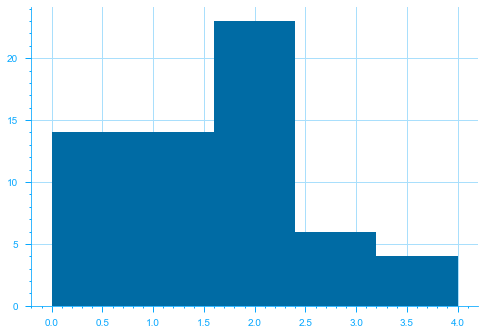

In [226]:
tmd.dateseries[("binning", "default", "bin_nr")].dropna().hist(bins=5)

In [206]:
bla = pd.cut(tmd.dateseries[("binning", "default", "ref_T")], [16,18,20,22], labels=False, retbins=True)

(2022-07-05             NaN
 2022-07-06    (18.0, 20.0]
 2022-07-07    (16.0, 18.0]
 2022-07-08    (18.0, 20.0]
 2022-07-09    (18.0, 20.0]
                   ...     
 2022-09-01    (16.0, 18.0]
 2022-09-02             NaN
 2022-09-03    (16.0, 18.0]
 2022-09-04    (18.0, 20.0]
 2022-09-05             NaN
 Name: (binning, default, ref_T), Length: 63, dtype: category
 Categories (3, interval[int64, right]): [(16, 18] < (18, 20] < (20, 22]],
 array([16, 18, 20, 22]))

In [9]:
bnd = inst.binned_delta("20-27", "20-1", "27-1")

In [ ]:
bnd.binned_data

In [ ]:
bnd.binned

/Users/Janjo/Documents/MEINE DOKUMENTE/Projects/kaltluftstrom/waldluft.py:858: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "face_color" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(img_path, face_color="white", bbox_inches="tight")


image was saved at Standortabhängiger_Temperaturabfall_nach_Tages-Referenztemperatur_W6W7W5W4W1W3W2W9W8S1S3S2S7S9S8_size-10-6.png


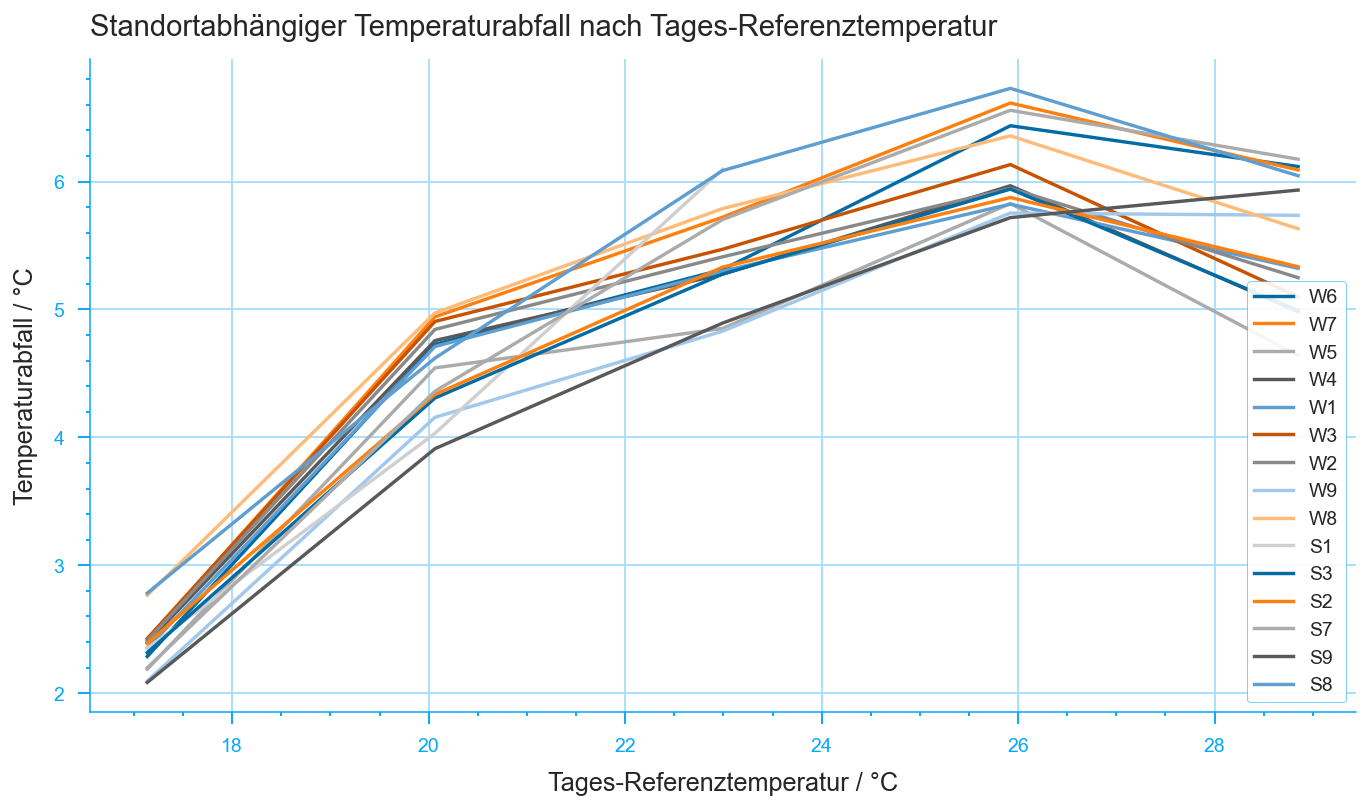

In [10]:
bnd.plot_t_drop(
    fig_legend_loc="lower right",
    xlabel="Tages-Referenztemperatur / °C",
    file_export=True,
    file_export_type="png",
)

In [ ]:
bnd.plot_t_drop(
    sensor_locations=(9,),
    fig_legend_loc="lower right",
    xlabel="Tages-Referenztemperatur / °C",
    file_export=True,
    file_export_type="png",
)

In [ ]:
inst.plot_temp_time(
    title="Übersicht aller Temperatursensoren, ganzer Zeitraum",
    file_export=True,
    file_export_type="png",
)

In [ ]:
inst.plot_temp_time(
    #sensor_locations=(1,2,),
    title="Tropennacht 22-1, 04.08.2022",
    file_export=True,
    xlim=(dt.datetime(2022,8,4,18),dt.datetime(2022,8,5,12))
)

In [ ]:
inst.plot_temp_time(
    #sensor_locations=(1,2,),
    title="18.08.2022, 18.08.2022",
    file_export=True,
    xlim=(dt.datetime(2022,8,18,18),dt.datetime(2022,8,19,12))
)

In [ ]:
inst.plot_temp_time(
    #sensor_locations=(1,2,),
    title="18.08.2022, 04.08.2022",
    #file_export=True,
    xlim=(dt.datetime(2022,8,16,18),dt.datetime(2022,8,21,12))
)

In [ ]:
inst.plot_temp_time(
    sensor_locations=(1,2,),
    title="Tropennacht 1, 04.08.2022",
    #file_export=True,
    xlim=(dt.datetime(2022,8,4,12),dt.datetime(2022,8,5,12))
)

In [ ]:
for i in range(1,10):
    inst.plot_temp_time(
        sensor_locations=(i,),
        title="Sensorstandort " + str(i),
        fig_size=(6,4),
        xlim=(dt.datetime(2022,7,13),dt.datetime(2022,7,17)),
        ylim=(14,22),
        fig_legend_loc="upper left",
    )

In [ ]:
inst.plot_temp_time(
    sensor_locations=(2,),
    title="Sensorstandort " + str(2),
    xlim=(dt.datetime(2022,7,13),dt.datetime(2022,7,17)),
    ylim=(14,22),
    fig_legend_loc="upper left",
    file_export=True,
)

## Playground

In [ ]:
inst.wtdl_int

In [ ]:
inst.sht_int

In [ ]:
inst.timeseries["W1"]["T"].max()

In [ ]:
inst.timeseries["S2"]["2022-08-15 01:31:17.000018":"2202-08-17 04:20:30.123456"]

In [ ]:
len(inst.selection)

In [ ]:
inst.selection

In [ ]:
timedelta = {"hours": 2, "seconds": 15}

In [ ]:
str(dt.datetime(2022,8,22,12) + dt.timedelta(**timedelta))

In [ ]:
date_earliest = dt.datetime(2022,8,18,12).date()
date_latest = dt.datetime(2022,8,22,15).date()
n_days = (date_latest - date_earliest).days + 1
for days in range(n_days):
    print(date_earliest + dt.timedelta(days=days))

In [ ]:
import time

In [ ]:
time.time()

In [ ]:
time.time()

In [ ]:
4 in (1,2,3,4.01)

In [ ]:
5 in None

In [ ]:
()

In [ ]:
not None

In [ ]:
df = pd.DataFrame(index=("W1", "W2"), columns=("min", "max"))

In [ ]:
df

In [ ]:
df.loc["W1"] = (1,2)

In [ ]:
df

In [ ]:
df["min"]

In [ ]:
dff = pd.DataFrame(index=(0,1,2,3), columns=pd.MultiIndex.from_tuples(zip(("A", "B",),("x", "y",))))

In [ ]:
dff

In [ ]:
tuples = [(1, 'red'), (1, 'blue'),
          (2, 'red'), (2, 'blue')]
pd.MultiIndex.from_tuples(tuples, names=('number', 'color'))

In [ ]:
dfff = pd.DataFrame(
    index=(0,1,2,3),
    columns=pd.MultiIndex.from_tuples(tuples, names=('number', 'color'))
)

In [ ]:
dfff = pd.DataFrame(
    columns=pd.MultiIndex.from_tuples((), names=('number', 'color'))
)

In [ ]:
dfff

In [ ]:
dfff[1,"green"] = (1,2,3,4)
dfff[1,"blue"] = (1,2,3,4)
dfff[2,"green"] = (1,2,3,4)
dfff[2,"blue"] = (1,2,3,4)

In [ ]:
dfff[1, "blue"]

In [ ]:
dfff[7, "white"] = (5,3,46,7)

In [ ]:
dfff

In [ ]:
zip?

In [ ]:
plt.figure??

In [ ]:
plt.figure.subplots??

In [ ]:
import matplotlib as mpl

In [ ]:
mpl.pyplot??

In [ ]:
class stds:
    
    def __init__(self, age):
        self.age = age
    
    @classmethod
    def fromYear(self, year):
        return self(2022- year)

    def tellage(self,):
        print("age:", self.age)

In [ ]:
std = stds(21)
std.tellage()

In [ ]:
std_ = stds.fromYear(2000)
std_.tellage()

In [ ]:
df1 = pd.DataFrame(data={"col1": [1,2,3,4], "col2": [9,8,7,6]})

In [ ]:
df1

In [ ]:
df2 = pd.DataFrame(
    columns=pd.MultiIndex.from_tuples(
        (),
        names=('sensor', 'key'),
    ),
)

In [ ]:
df2["A", "a"] = {1: 3, 2: 6, 4: 8}

In [ ]:
df2

In [ ]:
sr3 = pd.Series(data={1: 4, 3: 8, 5: 13}, name="col3")

In [ ]:
sr3

In [ ]:
pd.merge(df2["A"], sr3, left_index=True, right_index=True, how="outer")

In [ ]:
df2["A"] = df2["A"].merge(sr3, left_index=True, right_index=True, how="outer")

In [ ]:
df2

In [ ]:
df1.assign(col4=sr3)

In [ ]:
df1.insert(2, "col3", sr3)

In [ ]:
df1

In [ ]:
dateserie_index_Aa = [
    dt.datetime(2022, 8, 1) + dt.timedelta(days=day)
    for day
    in range(20)
]
dateserie_index_Aa

In [ ]:
dateserie_index_Ab = [
    dt.datetime(2022, 8, 2) + dt.timedelta(days=day)
    for day
    in range(18)
]
dateserie_index_Ab

In [ ]:
dateserie_index_Ba = [
    dt.datetime(2022, 7, 30) + dt.timedelta(days=day)
    for day
    in range(18)
]
dateserie_index_Ba

In [ ]:
dateserie_index_Bb = [
    dt.datetime(2022, 8, 4) + dt.timedelta(days=day)
    for day
    in range(22)
]
dateserie_index_Bb

In [ ]:
len(dateserie_index_Aa)

In [ ]:
s_Aa = pd.Series(index=dateserie_index_Aa, data=np.random.randint(5, size=len(dateserie_index_Aa)), name=("A", "a"))
s_Aa

In [ ]:
s_Ab = pd.Series(index=dateserie_index_Ab, data=np.random.randint(5, size=len(dateserie_index_Ab)), name=("A", "b"))
s_Ab

In [ ]:
s_Ba = pd.Series(index=dateserie_index_Ba, data=np.random.randint(5, size=len(dateserie_index_Ba)), name=("B", "a"))
s_Ba[dt.datetime(2022, 8, 18)] = 4
s_Ba

In [ ]:
s_Bb = pd.Series(index=dateserie_index_Bb, data=np.random.randint(5, size=len(dateserie_index_Bb)), name=("B", "b"))
s_Bb

In [ ]:
s_Ab - s_Aa

In [ ]:
df_dt = pd.DataFrame(
    columns=pd.MultiIndex.from_tuples(
        (),
        names=('sensor', 'key'),
    ),
)

In [ ]:
df_dt = pd.merge(s_Aa, s_Ab, left_index=True, right_index=True, how="outer")
df_dt

In [ ]:
df_dt = pd.merge(df_dt, s_Ba, left_index=True, right_index=True, how="outer")
df_dt

In [ ]:
df_dt = pd.merge(df_dt, s_Bb, left_index=True, right_index=True, how="outer")
df_dt

In [ ]:
df_dt.loc[dt.datetime(2022, 7, 28), ("D", "a")] = 0
df_dt

In [ ]:
df_dt["A", "a"] = s_Aa
df_dt

In [ ]:
df_dt["A", "b"] = s_Ab
df_dt

In [ ]:
df_dt["B", "a"] = s_Ba
df_dt

In [ ]:
df_dt.loc[dt.datetime(2022, 8, 28)] = ()
df_dt

In [ ]:
pd.concat([df_dt, pd.DataFrame(index=(dt.datetime(2022, 8, 28),))])

In [ ]:
df_dt.copy()